In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.9/235.7 GB disk)


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: creat yaml file

%%writefile data.yaml
    train: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/train/images
    val: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/images
    test: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/images
    nc: 2
    names : ['ASD', 'TD']

Writing data.yaml


In [ ]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolov10l.yaml")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data= "data.yaml", epochs=50, imgsz=640)

YOLOv10l summary: 364 layers, 25,888,688 parameters, 25,888,672 gradients, 127.9 GFLOPs
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10l.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

 10                  -1  1    990976  ultralytics.nn.modules.block.PSA             [512, 512]                    
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  3   2006528  ultralytics.nn.modules.block.C2fCIB          [1024, 512, 3, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.3 ms, read: 0.0±0.0 MB/s, size: 10.9 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/train/labels... 4917 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4917/4917 [02:39<00:00, 30.74it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.1±0.0 MB/s, size: 12.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/labels... 1405 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1405/1405 [00:45<00:00, 31.11it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.7G      3.572      6.127      5.359         13        640: 100%|██████████| 308/308 [01:14<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.75it/s]


                   all       1405       1405      0.424      0.779      0.455      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        15G      1.811      2.349      3.013         16        640: 100%|██████████| 308/308 [01:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.95it/s]

                   all       1405       1405      0.449      0.871      0.502       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.1G      1.551      2.046      2.714         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all       1405       1405      0.489      0.931       0.51      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.2G      1.401      1.904      2.572         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all       1405       1405      0.492      0.916      0.518      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      15.3G      1.321      1.855      2.498         17        640: 100%|██████████| 308/308 [01:05<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all       1405       1405      0.457      0.916      0.495      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.3G      1.264      1.807      2.443         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.98it/s]

                   all       1405       1405      0.478      0.925      0.515      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      15.4G      1.229      1.783      2.417         13        640: 100%|██████████| 308/308 [01:05<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.02it/s]

                   all       1405       1405       0.49      0.975      0.527      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      15.5G      1.183      1.761      2.372         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.99it/s]

                   all       1405       1405      0.494      0.954      0.533      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      15.6G      1.175      1.738      2.357         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.497      0.968      0.566      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      15.7G      1.153      1.713      2.348         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405      0.506      0.947       0.62      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.8G       1.15      1.704      2.354         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]

                   all       1405       1405       0.51      0.903      0.645      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      15.8G       1.13      1.662      2.332         18        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.99it/s]

                   all       1405       1405      0.576      0.845       0.71      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      15.9G      1.106      1.645      2.317         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.533      0.899      0.699      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        16G      1.107      1.629      2.311         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405       0.62      0.835      0.748      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      16.1G      1.109      1.585      2.308         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405      0.656      0.863      0.798      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      16.2G      1.074       1.56      2.277         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405      0.722      0.808      0.821      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      16.2G       1.08      1.525      2.289         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.93it/s]

                   all       1405       1405      0.671      0.876      0.844      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      16.3G      1.056      1.508      2.269         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405      0.674      0.835      0.809      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      16.4G      1.068      1.482       2.28         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.94it/s]

                   all       1405       1405      0.688      0.875      0.857      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.5G       1.05      1.441      2.263         18        640: 100%|██████████| 308/308 [01:06<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.668       0.88      0.842      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      16.6G      1.036      1.411      2.262         16        640: 100%|██████████| 308/308 [01:05<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405      0.753      0.841      0.883      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      16.6G       1.04       1.41      2.254         12        640: 100%|██████████| 308/308 [01:05<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.05it/s]

                   all       1405       1405      0.777       0.82      0.869      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      16.7G       1.03       1.37      2.249         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.803      0.857      0.898       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.8G      1.037      1.332      2.247         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.839      0.851      0.933      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      16.9G      1.023      1.311       2.24         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405      0.806      0.845      0.913       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        17G     0.9962      1.299      2.209          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.04it/s]

                   all       1405       1405      0.799       0.89      0.926      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        17G      1.025       1.25      2.235         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.08it/s]

                   all       1405       1405      0.823      0.914       0.95      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      17.1G      1.019      1.246      2.229         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]

                   all       1405       1405      0.811      0.873      0.947      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      17.2G      1.003      1.212      2.211         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.96it/s]

                   all       1405       1405       0.77      0.908       0.94      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      17.3G      1.009      1.172      2.216         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]

                   all       1405       1405      0.902      0.909      0.966      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      17.4G      1.003      1.158      2.218         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.777      0.905      0.964      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      17.5G     0.9909      1.139      2.214         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.98it/s]

                   all       1405       1405      0.896       0.92      0.966      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      17.5G      0.971       1.12      2.192          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.923      0.922      0.974      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      17.6G     0.9845      1.102      2.199         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.14it/s]

                   all       1405       1405      0.891      0.938      0.973      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      17.7G      0.973      1.064      2.193         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.859      0.906      0.966      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      17.8G     0.9702      1.064      2.189         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.876      0.904      0.968      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      17.9G     0.9719      1.028      2.194         18        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405      0.868      0.883      0.975      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      17.9G     0.9652      1.018      2.183         17        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405      0.951      0.945      0.986      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        18G     0.9649     0.9745       2.18         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.958      0.946      0.988      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      18.1G     0.9592     0.9714      2.179         17        640: 100%|██████████| 308/308 [01:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.83it/s]

                   all       1405       1405      0.941      0.945      0.983      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      18.2G     0.9529     0.9353      2.175         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.90it/s]

                   all       1405       1405      0.948      0.957      0.989      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      18.3G     0.9494     0.9187      2.174         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.00it/s]

                   all       1405       1405      0.943       0.96      0.989      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      18.3G     0.9425     0.8999      2.166         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.98it/s]

                   all       1405       1405      0.954      0.957      0.989      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      18.4G     0.9434       0.91      2.165         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405      0.962      0.959       0.99      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      18.5G     0.9331     0.8633      2.156          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]

                   all       1405       1405      0.964      0.966       0.99      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      18.7G     0.9281     0.8675      2.154         18        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.04it/s]

                   all       1405       1405      0.962       0.97      0.992       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      18.8G     0.9296     0.8556      2.158         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.944      0.953      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      18.9G     0.9219     0.8485      2.152         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.29it/s]

                   all       1405       1405      0.956      0.976      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      19.1G     0.9246     0.8262      2.149         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.19it/s]

                   all       1405       1405      0.963       0.98      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      19.2G     0.9163     0.8112      2.146         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405       0.98      0.982      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      19.4G     0.9184     0.8087       2.15         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.11it/s]

                   all       1405       1405       0.97      0.986      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      19.5G     0.9152     0.7976      2.141         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.966      0.944      0.991       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      19.7G     0.9071     0.7629      2.138         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.974      0.982      0.994      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      19.8G     0.9062     0.7714      2.133          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.20it/s]

                   all       1405       1405      0.974      0.972      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.9G     0.9054     0.7729      2.133         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.08it/s]

                   all       1405       1405      0.972      0.979      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.9G     0.9078     0.7631      2.132         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405      0.986      0.983      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.9G     0.8947     0.7559      2.131         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.981      0.987      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.9G     0.8843     0.7189       2.12         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all       1405       1405      0.979      0.979      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        13G     0.8868     0.7122      2.124         13        640: 100%|██████████| 308/308 [01:05<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.19it/s]

                   all       1405       1405      0.978       0.99      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.1G     0.8892      0.724       2.12         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.33it/s]

                   all       1405       1405      0.978      0.985      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.2G     0.8912     0.6922      2.128         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.32it/s]

                   all       1405       1405      0.983      0.991      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.3G     0.8813     0.6903      2.112         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.40it/s]

                   all       1405       1405      0.988      0.982      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.4G     0.8846     0.6753      2.118         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.984      0.988      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.6G      0.869     0.6747      2.104         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.35it/s]

                   all       1405       1405      0.981      0.977      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.7G     0.8717     0.6663      2.106          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405      0.987       0.99      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.9G     0.8715      0.648      2.103         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.20it/s]

                   all       1405       1405      0.995      0.981      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        14G     0.8714     0.6611        2.1         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.08it/s]

                   all       1405       1405      0.988      0.989      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.2G     0.8516     0.6342      2.089         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.988      0.985      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.3G      0.862     0.6341        2.1          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.13it/s]

                   all       1405       1405      0.989      0.991      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.5G     0.8486     0.6076      2.084          8        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.16it/s]

                   all       1405       1405      0.992      0.986      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.6G     0.8609     0.6234      2.101         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.992      0.991      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.8G     0.8518     0.6016      2.085         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.07it/s]

                   all       1405       1405      0.982      0.986      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        15G     0.8485     0.6041      2.092         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405      0.986      0.997      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.1G      0.852     0.5982      2.089         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405       0.99      0.996      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.3G     0.8347     0.5686      2.079         12        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.42it/s]

                   all       1405       1405      0.991      0.994      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.4G     0.8385      0.571      2.078          9        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.991      0.993      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.5G     0.8382     0.5783      2.084         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.992      0.997      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      15.7G     0.8275     0.5707      2.071         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.35it/s]

                   all       1405       1405       0.99       0.99      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.8G     0.8309     0.5664      2.075         16        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.31it/s]

                   all       1405       1405      0.992      0.996      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        16G     0.8228     0.5504      2.067         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.30it/s]

                   all       1405       1405      0.996      0.994      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      16.1G     0.8243       0.55      2.075         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405      0.992      0.996      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      16.3G     0.8144     0.5322      2.065         14        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405      0.993      0.994      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      16.4G     0.8215     0.5429      2.068         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.995      0.997      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      16.6G     0.8234     0.5344       2.06         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.32it/s]

                   all       1405       1405      0.996      0.998      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      16.8G     0.8069     0.5205      2.053         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]

                   all       1405       1405      0.998      0.996      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      16.9G     0.8122     0.5143      2.057         15        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.25it/s]

                   all       1405       1405      0.995      0.996      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      17.1G     0.8102     0.5241      2.052         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405      0.999      0.997      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      17.2G     0.8049     0.5016      2.057         11        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.21it/s]

                   all       1405       1405      0.994      0.998      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      17.4G     0.7976      0.503      2.052         13        640: 100%|██████████| 308/308 [01:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.25it/s]

                   all       1405       1405      0.997      0.997      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      17.5G     0.7967     0.5079      2.049         10        640: 100%|██████████| 308/308 [01:06<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.27it/s]

                   all       1405       1405      0.997      0.996      0.995      0.938


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      17.7G     0.7116     0.3552      1.918          5        640: 100%|██████████| 308/308 [01:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.18it/s]

                   all       1405       1405      0.997      0.993      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      17.8G     0.6995     0.3154      1.898          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.28it/s]

                   all       1405       1405      0.995      0.992      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        18G     0.6951     0.3112      1.897          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.996      0.992      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      18.1G     0.6933     0.3073      1.898          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.26it/s]

                   all       1405       1405      0.997      0.995      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      18.3G     0.6893      0.296      1.894          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.36it/s]

                   all       1405       1405      0.997      0.994      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      18.4G     0.6776     0.2845      1.888          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.12it/s]

                   all       1405       1405       0.99      0.994      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      18.6G     0.6747     0.2915       1.88          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.26it/s]

                   all       1405       1405      0.991      0.991      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      18.7G     0.6714     0.2801      1.878          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.24it/s]

                   all       1405       1405      0.996      0.993      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      18.9G     0.6712     0.2847      1.874          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all       1405       1405      0.998      0.999      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        19G     0.6675     0.2741      1.872          5        640: 100%|██████████| 308/308 [01:06<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.20it/s]

                   all       1405       1405      0.997      0.998      0.995      0.938



100 epochs completed in 2.049 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv10l summary (fused): 174 layers, 24,310,870 parameters, 0 gradients, 120.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:05<00:00,  7.43it/s]


                   all       1405       1405      0.999      0.997      0.995      0.944
                   ASD        704        704      0.999      0.997      0.995      0.939
                    TD        701        701      0.999      0.997      0.995      0.948
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!cp -r runs/detect/train /content/drive/MyDrive/sMRI2_yolov10_training_results/

In [ ]:
import torch
import torch.nn as nn
from ultralytics.utils.metrics import ConfusionMatrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
class DICEEvaluator:
    """
    DICE (Directed Sparsification) Evaluation Matrix for YOLO model
    Particularly useful for medical imaging segmentation and classification tasks
    """

    def __init__(self, num_classes=2, class_names=['ASD', 'TD']):
        self.num_classes = num_classes
        self.class_names = class_names
        self.reset()

    def reset(self):
        """Reset all metrics"""
        self.confusion_matrix = np.zeros((self.num_classes, self.num_classes))
        self.dice_scores = []
        self.iou_scores = []

    def dice_coefficient(self, pred, target, smooth=1e-6):
        """
        Calculate DICE coefficient
        Args:
            pred: predicted mask/labels
            target: ground truth mask/labels
            smooth: smoothing factor to avoid division by zero
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        dice = (2.0 * intersection + smooth) / (np.sum(pred) + np.sum(target) + smooth)

        return dice

    def iou_score(self, pred, target, smooth=1e-6):
        """
        Calculate Intersection over Union (IoU) score
        """
        pred = pred.flatten()
        target = target.flatten()

        intersection = np.sum(pred * target)
        union = np.sum(pred) + np.sum(target) - intersection
        iou = (intersection + smooth) / (union + smooth)

        return iou

    def directed_sparsification_score(self, pred, target, sparsity_levels=[0.1, 0.3, 0.5, 0.7, 0.9]):
        """
        Calculate Directed Sparsification score
        This measures how well the model maintains performance with increasing sparsity
        """
        scores = []

        for sparsity in sparsity_levels:
            # Apply sparsification by zeroing out lowest confidence predictions
            pred_sparse = pred.copy()
            threshold = np.percentile(pred_sparse, sparsity * 100)
            pred_sparse[pred_sparse < threshold] = 0

            # Calculate DICE score for sparsified prediction
            dice_sparse = self.dice_coefficient(pred_sparse, target)
            scores.append(dice_sparse)

        return np.array(scores), sparsity_levels

    def update(self, predictions, targets):
        """
        Update metrics with new predictions and targets
        """
        for pred, target in zip(predictions, targets):
            # Convert to numpy if tensor
            if torch.is_tensor(pred):
                pred = pred.cpu().numpy()
            if torch.is_tensor(target):
                target = target.cpu().numpy()

            # Ensure predictions and targets are in valid range
            pred = np.clip(pred, 0, self.num_classes - 1)
            target = np.clip(target, 0, self.num_classes - 1)

            # Calculate DICE and IoU scores for binary masks
            if pred.ndim > 1 and target.ndim > 1:
                # For mask-based evaluation
                dice = self.dice_coefficient(pred, target)
                iou = self.iou_score(pred, target)

                self.dice_scores.append(dice)
                self.iou_scores.append(iou)

                # Convert masks to class predictions
                pred_class = int(np.mean(pred) > 0.5)  # Simple threshold for binary
                target_class = int(np.mean(target) > 0.5)
            else:
                # For class-based evaluation
                pred_class = int(pred) if np.isscalar(pred) else int(np.argmax(pred))
                target_class = int(target) if np.isscalar(target) else int(np.argmax(target))

                # For class predictions, use perfect dice/iou
                self.dice_scores.append(1.0 if pred_class == target_class else 0.0)
                self.iou_scores.append(1.0 if pred_class == target_class else 0.0)

            # Ensure class indices are within bounds
            pred_class = max(0, min(pred_class, self.num_classes - 1))
            target_class = max(0, min(target_class, self.num_classes - 1))

            self.confusion_matrix[target_class, pred_class] += 1

    def compute_metrics(self):
        """
        Compute final metrics
        """
        metrics = {
            'mean_dice': np.mean(self.dice_scores),
            'std_dice': np.std(self.dice_scores),
            'mean_iou': np.mean(self.iou_scores),
            'std_iou': np.std(self.iou_scores),
            'confusion_matrix': self.confusion_matrix
        }

        # Calculate per-class metrics
        for i, class_name in enumerate(self.class_names):
            tp = self.confusion_matrix[i, i]
            fp = np.sum(self.confusion_matrix[:, i]) - tp
            fn = np.sum(self.confusion_matrix[i, :]) - tp

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[f'{class_name}_precision'] = precision
            metrics[f'{class_name}_recall'] = recall
            metrics[f'{class_name}_f1'] = f1

        return metrics

    def plot_confusion_matrix(self, normalize=True):
        """
        Plot confusion matrix
        """
        cm = self.confusion_matrix
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
            fmt = '.2f'
        else:
            title = 'Confusion Matrix'
            fmt = 'd'

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def plot_dice_distribution(self):
        """
        Plot DICE score distribution
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.dice_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(np.mean(self.dice_scores), color='red', linestyle='--',
                   label=f'Mean: {np.mean(self.dice_scores):.3f}')
        plt.xlabel('DICE Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of DICE Scores')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

In [ ]:
def evaluate_yolo_with_dice(model, data_path, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Evaluate YOLO model with DICE metrics
    """
    # Initialize DICE evaluator
    dice_evaluator = DICEEvaluator(num_classes=2, class_names=['ASD', 'TD'])

    # Get validation results from YOLO
    results = model.val(data=data_path, device=device)

    # Process validation images for DICE calculation
    val_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/images')
    labels_dir = Path('/content/drive/MyDrive/Colab Notebooks/ASDsMRI2.v2i.yolov8/test/labels')

    predictions = []
    targets = []

    print(f"Processing validation images from: {val_dir}")

    # Get all image files
    image_files = list(val_dir.glob('*.jpg')) + list(val_dir.glob('*.png')) + list(val_dir.glob('*.jpeg'))

    if not image_files:
        print("No image files found in validation directory!")
        return dice_evaluator, {}

    print(f"Found {len(image_files)} validation images")

    for img_path in image_files[:462]:  # Limit to first 50 images to avoid memory issues
        try:
            # Run inference
            result = model.predict(str(img_path), conf=0.25, device=device, verbose=False)

            # Get corresponding label file
            label_path = labels_dir / f"{img_path.stem}.txt"

            # Initialize prediction and target as class labels (0 or 1)
            pred_class = 0  # Default to class 0 (ASD)
            target_class = 0  # Default to class 0 (ASD)

            # Extract prediction class
            if result[0].boxes is not None and len(result[0].boxes) > 0:
                # Get the class with highest confidence
                confidences = result[0].boxes.conf.cpu().numpy()
                classes = result[0].boxes.cls.cpu().numpy()

                if len(confidences) > 0:
                    best_idx = np.argmax(confidences)
                    pred_class = int(classes[best_idx])
                    # Ensure class is within bounds
                    pred_class = max(0, min(pred_class, 1))

            # Extract target class from label file
            if label_path.exists():
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if lines:
                        # Get first annotation's class
                        target_class = int(lines[0].split()[0])
                        # Ensure class is within bounds
                        target_class = max(0, min(target_class, 1))

            predictions.append(pred_class)
            targets.append(target_class)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    if not predictions:
        print("No valid predictions found!")
        return dice_evaluator, {}

    print(f"Successfully processed {len(predictions)} images")
    print(f"Prediction distribution: {np.bincount(predictions)}")
    print(f"Target distribution: {np.bincount(targets)}")

    # Update DICE evaluator with predictions and targets
    dice_evaluator.update(predictions, targets)

    # Compute final metrics
    metrics = dice_evaluator.compute_metrics()

    return dice_evaluator, metrics

Evaluating model with DICE metrics...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv10l summary (fused): 174 layers, 24,310,870 parameters, 0 gradients, 120.0 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 13.5±3.6 MB/s, size: 24.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/ASDsMRI.v3i.yolov8/valid/labels.cache... 497 images, 45 backgrounds, 0 corrupt: 100%|██████████| 541/541 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]


                   all        541        496      0.898      0.985      0.945      0.927
                   ASD        234        234      0.908      0.979      0.955      0.939
                    TD        262        262      0.889      0.992      0.935      0.915
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train2
Processing validation images from: /content/drive/MyDrive/Colab Notebooks/ASDsMRI.v3i.yolov8/valid/images
Found 541 validation images
Successfully processed 462 images
Prediction distribution: [253 209]
Target distribution: [272 190]

DICE EVALUATION RESULTS
Mean DICE Score: 0.9545 ± 0.2083
Mean IoU Score: 0.9545 ± 0.2083

Per-class metrics:
ASD:
  Precision: 0.9960
  Recall: 0.9265
  F1-Score: 0.9600
TD:
  Precision: 0.9043
  Recall: 0.9947
  F1-Score: 0.9474


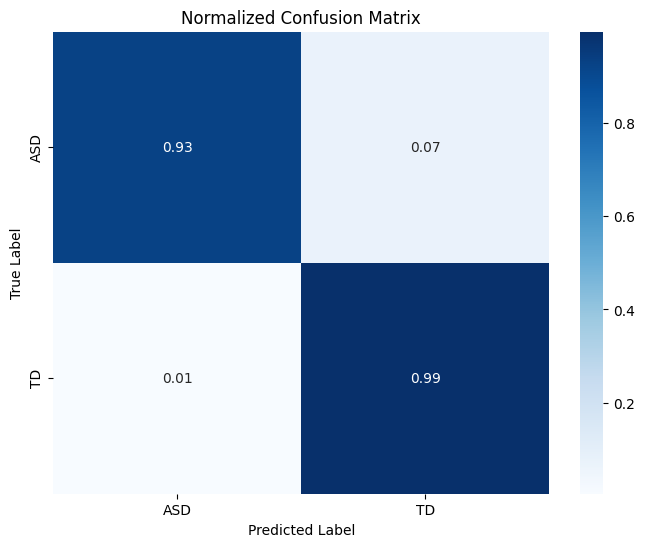

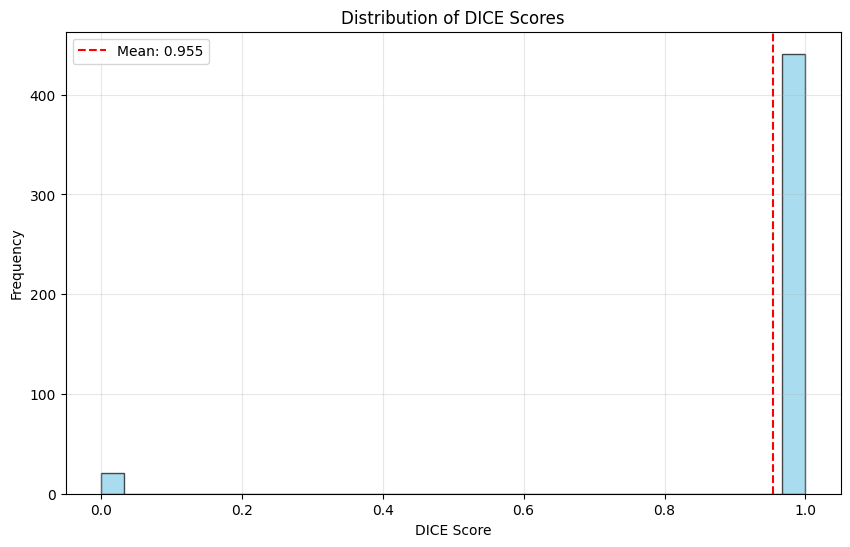

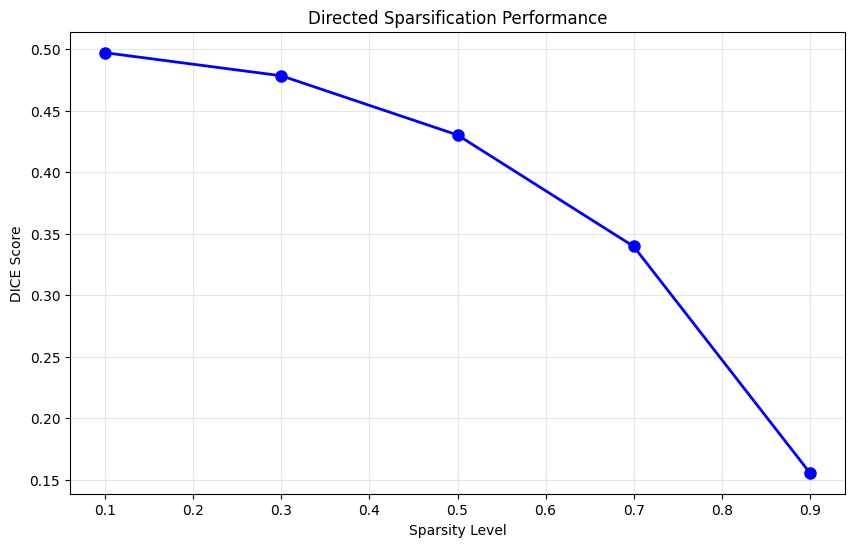

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl'

In [ ]:
print("Evaluating model with DICE metrics...")
dice_evaluator, dice_metrics = evaluate_yolo_with_dice(model, "data.yaml")

# Print DICE metrics
print("\n" + "="*50)
print("DICE EVALUATION RESULTS")
print("="*50)
print(f"Mean DICE Score: {dice_metrics['mean_dice']:.4f} ± {dice_metrics['std_dice']:.4f}")
print(f"Mean IoU Score: {dice_metrics['mean_iou']:.4f} ± {dice_metrics['std_iou']:.4f}")
print("\nPer-class metrics:")
for class_name in ['ASD', 'TD']:
    print(f"{class_name}:")
    print(f"  Precision: {dice_metrics[f'{class_name}_precision']:.4f}")
    print(f"  Recall: {dice_metrics[f'{class_name}_recall']:.4f}")
    print(f"  F1-Score: {dice_metrics[f'{class_name}_f1']:.4f}")

# Plot results
dice_evaluator.plot_confusion_matrix()
dice_evaluator.plot_dice_distribution()

# Calculate and plot directed sparsification scores
sample_pred = np.random.rand(100, 100)  # Replace with actual prediction
sample_target = np.random.randint(0, 2, (100, 100))  # Replace with actual target

sparsity_scores, sparsity_levels = dice_evaluator.directed_sparsification_score(
    sample_pred, sample_target
)

plt.figure(figsize=(10, 6))
plt.plot(sparsity_levels, sparsity_scores, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Sparsity Level')
plt.ylabel('DICE Score')
plt.title('Directed Sparsification Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save results
dice_results = {
    'dice_scores': dice_evaluator.dice_scores,
    'iou_scores': dice_evaluator.iou_scores,
    'confusion_matrix': dice_evaluator.confusion_matrix,
    'metrics': dice_metrics
}

# Save to drive
import pickle
with open('/content/drive/MyDrive/MRI_yolov10_training_results/dice_evaluation.pkl', 'wb') as f:
    pickle.dump(dice_results, f)

print("DICE evaluation results saved to drive!")